<a href="https://colab.research.google.com/github/VoKhoiNhon/Ml2023/blob/main/ML_GK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to deal with classification task using **Random Forests** and **Naïve Bayes** algorithms with/without **Feature Selection**. 

*   **Deadline: 23:59, 25/03/2023**



# Import libraries

In [ ]:
from sklearn.utils.fixes import sklearn
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML'
from sklearn import datasets
from sklearn import svm 
from sklearn import metrics as m
from sklearn import tree 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts
from prettytable import PrettyTable
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier as knc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn import feature_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import seaborn as sns

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML


# **Xữ lý dữ liệu**

In [ ]:
df = pd.read_csv('DataAnalyst.csv')



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

In [ ]:
df['Easy Apply'] = df['Easy Apply'].replace('-1', 1)
df['Easy Apply'] = df['Easy Apply'].replace('True', 0)
df.rename(columns={'Easy Apply': 'Difficult Apply'}, inplace=True)
df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Difficult Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,0
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,1
2249,2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",1
2250,2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",-1.0,Spiceorb,"Denver, CO",-1,-1,-1,-1,-1,-1,-1,-1,1
2251,2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),-1,1


<ipython-input-29-de18f0707d35>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='viridis')


<Axes: >

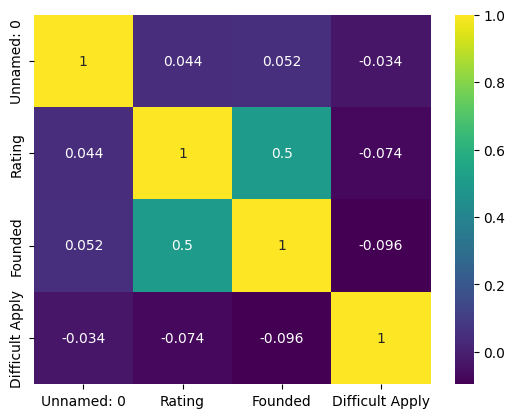

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='viridis')

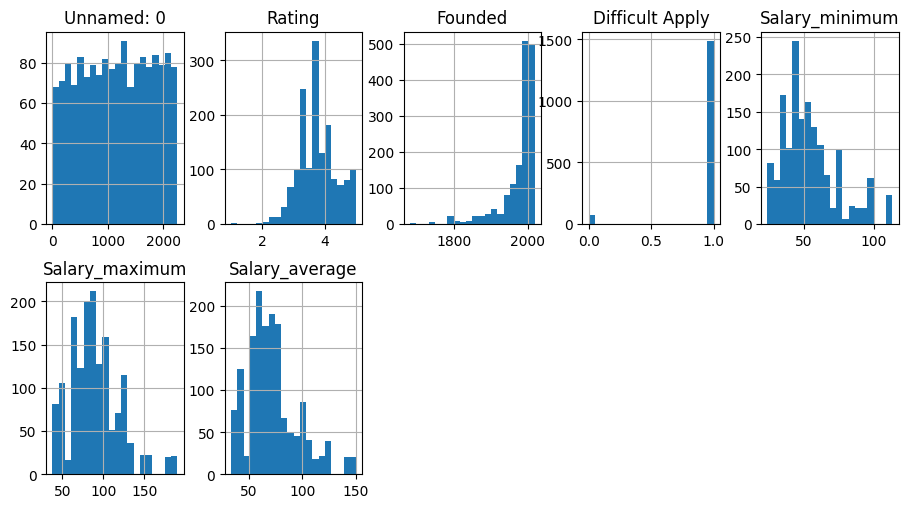

In [ ]:
df.hist(bins=20,figsize=(11,9),layout=(3,5));

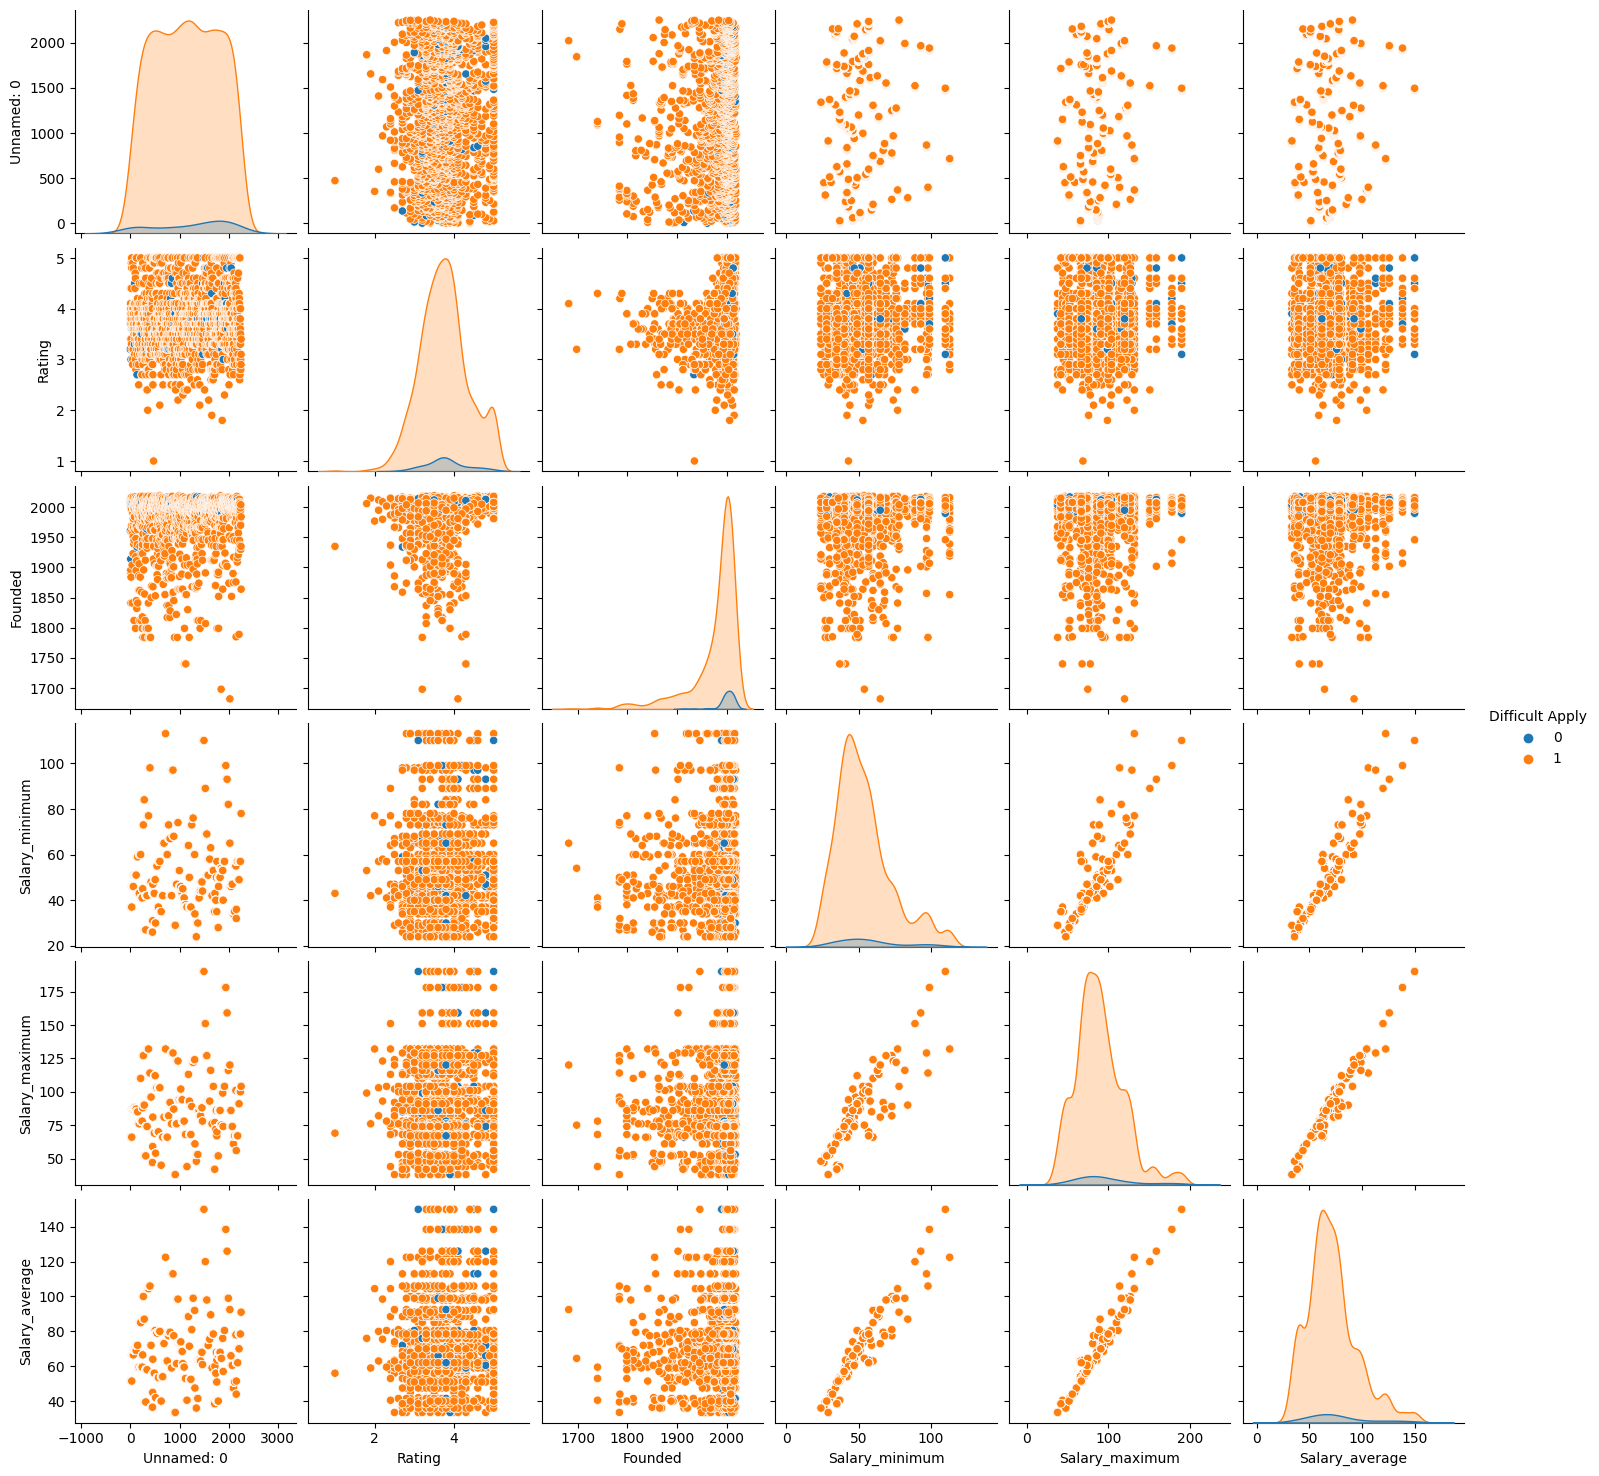

In [ ]:
sns.pairplot(df,hue='Difficult Apply');

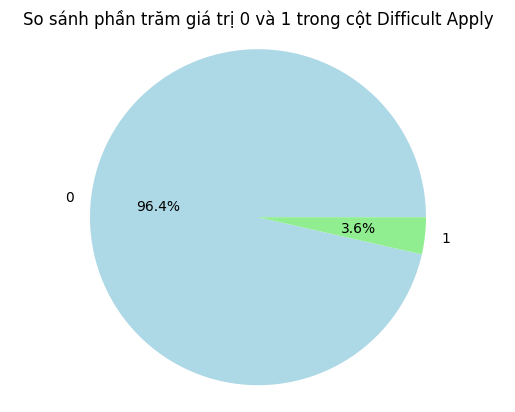

In [ ]:
counts = df['Difficult Apply'].value_counts()
percentages = counts / counts.sum() * 100
labels = ['0', '1']
colors = ['lightblue', 'lightgreen']
plt.pie(percentages, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('So sánh phần trăm giá trị 0 và 1 trong cột ' + "Difficult Apply")
plt.axis('equal')
plt.show()

In [ ]:
df = df.replace('-1', np.nan)
df = df.replace(-1, np.nan)
df = df.replace(-1.0, np.nan)

In [ ]:
df.isnull().sum()

Unnamed: 0              0
Job Title               0
Salary Estimate         1
Job Description         0
Rating                272
Company Name            1
Location                0
Headquarters          172
Size                  163
Founded               660
Type of ownership     163
Industry              353
Sector                353
Revenue               163
Competitors          1732
Difficult Apply         0
dtype: int64

<Figure size 1500x500 with 0 Axes>

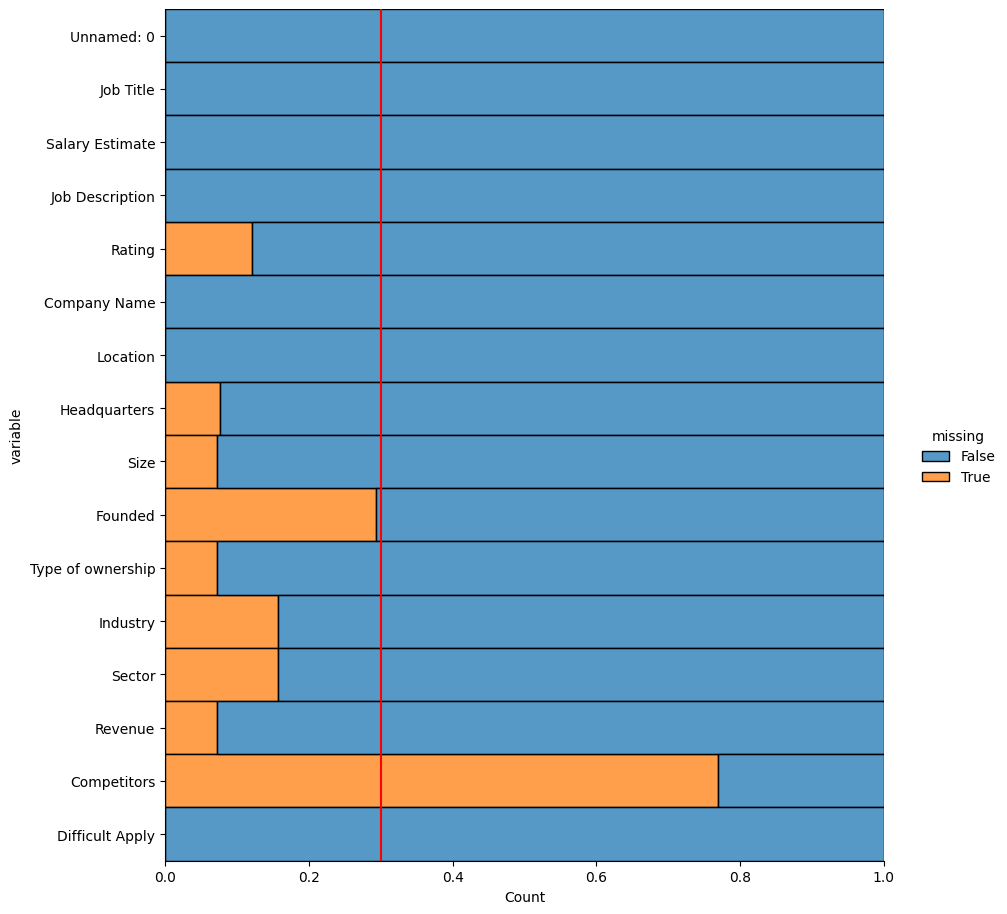

In [ ]:
import seaborn as sns
plt.figure(figsize = (15, 5))

sns.displot(
    data = df.isnull().melt(value_name = "missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    height = 9.25)

plt.axvline(0.3, color = "r")
plt.show()

In [ ]:
df.dropna(axis=1, thresh=len(df)*0.25, inplace=True)
threshold = len(df.columns) - len(df.columns)*0.07  # Ví dụ: Xóa các hàng có ít hơn 2 giá trị non-null
df.dropna(thresh=threshold, inplace=True)
df.isnull().sum()
df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Difficult Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),0
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2247,2247,Marketing/Communications - Data Analyst-Marketing,$78K-$104K (Glassdoor est.),Job Description\nJob Title: Marketing/Communic...,4.1,APN Software Services Inc.\n4.1,"Broomfield, CO","Newark, CA",51 to 200 employees,NaN,Company - Private,Computer Hardware & Software,Information Technology,$25 to $50 million (USD),1
2248,2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,1
2249,2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935.0,Company - Public,Wholesale,Business Services,$10+ billion (USD),1
2251,2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),1


In [ ]:
df.isnull().sum()

Unnamed: 0          0
Salary Estimate     1
Rating             16
Size                0
Revenue             0
Difficult Apply     0
dtype: int64

In [ ]:
df = df.drop(['Job Title','Job Description','Company Name','Type of ownership','Industry', 'Founded','Sector','Location','Headquarters'], axis=1)
df

,Unnamed: 0,Salary Estimate,Rating,Size,Revenue,Difficult Apply
0,0,$37K-$66K (Glassdoor est.),3.2,201 to 500 employees,$100 to $500 million (USD),0
1,1,$37K-$66K (Glassdoor est.),3.8,10000+ employees,$2 to $5 billion (USD),1
2,2,$37K-$66K (Glassdoor est.),3.4,1001 to 5000 employees,Unknown / Non-Applicable,1
3,3,$37K-$66K (Glassdoor est.),4.1,201 to 500 employees,$50 to $100 million (USD),1
4,4,$37K-$66K (Glassdoor est.),3.9,501 to 1000 employees,$100 to $500 million (USD),0
...,...,...,...,...,...,...
2247,2247,$78K-$104K (Glassdoor est.),4.1,51 to 200 employees,$25 to $50 million (USD),1
2248,2248,$78K-$104K (Glassdoor est.),2.5,51 to 200 employees,Unknown / Non-Applicable,1
2249,2249,$78K-$104K (Glassdoor est.),2.9,10000+ employees,$10+ billion (USD),1
2251,2251,$78K-$104K (Glassdoor est.),3.1,201 to 500 employees,$25 to $50 million (USD),1


<Figure size 1500x500 with 0 Axes>

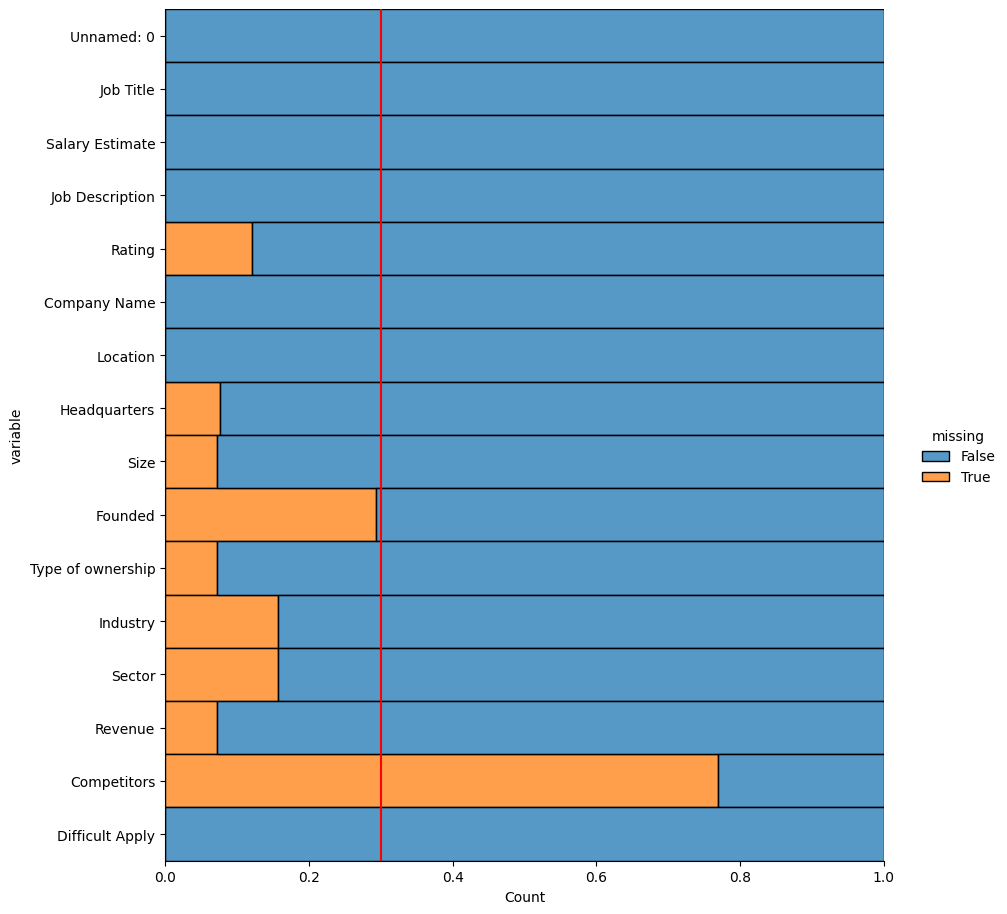

In [ ]:

plt.figure(figsize = (15, 5))

sns.displot(
    data = df.isnull().melt(value_name = "missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    height = 9.25)

plt.axvline(0.3, color = "r")
plt.show()

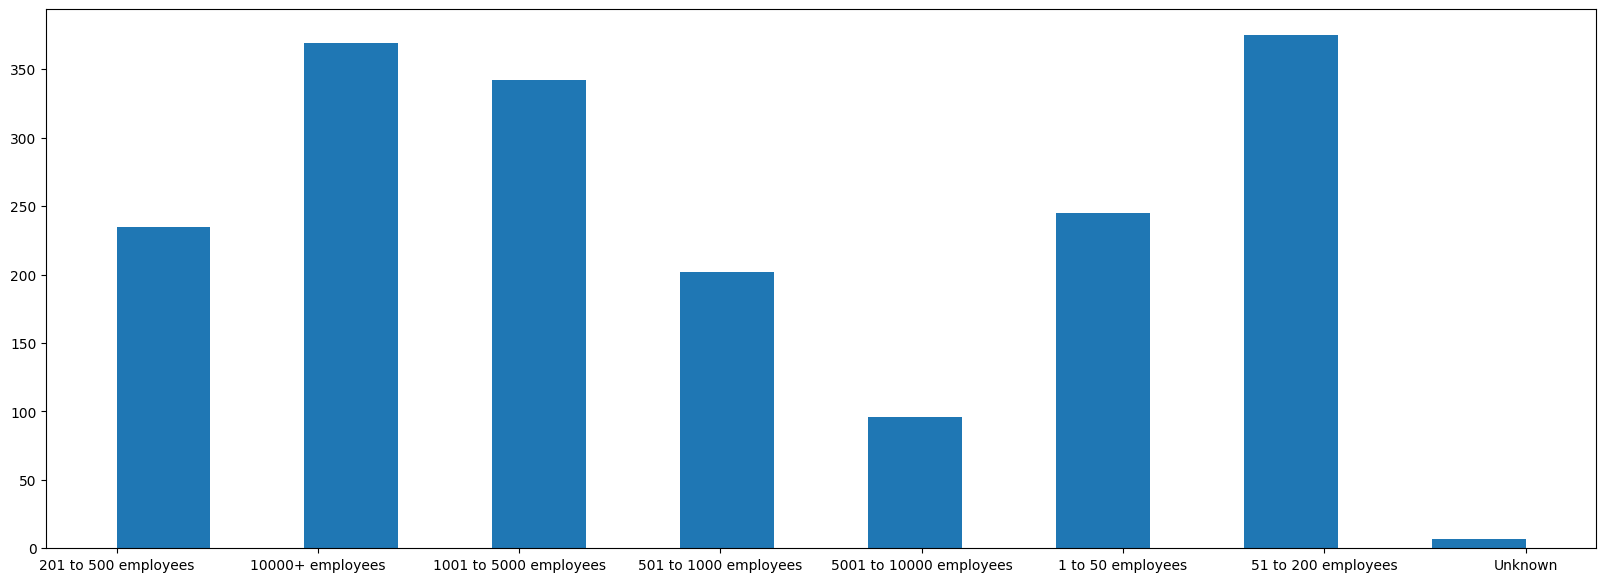

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
 

a =df.Size
fig, ax = plt.subplots(figsize =(20, 7))
ax.hist(a, bins=15 )
plt.show()

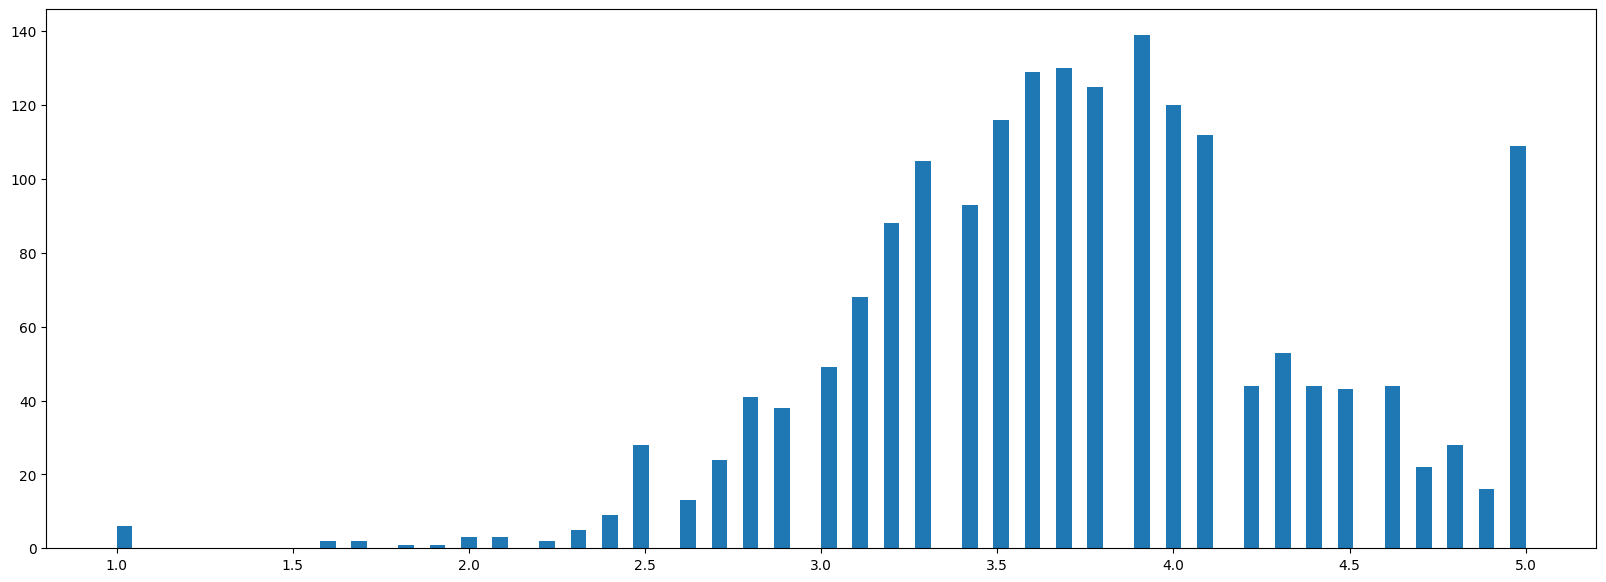

In [ ]:
a =df.Rating
fig, ax = plt.subplots(figsize =(20, 7))
ax.hist(a, bins=90 )
plt.show()

In [ ]:
df=df.drop('Revenue', axis=1)

In [ ]:
df['Salary_minimum']= df['Salary Estimate'].str.lstrip('$').str[:3].str.replace('K','').str.strip().astype('float')
df['Salary_maximum'] = df['Salary Estimate'].str[6:10].str.replace('K','').str.lstrip('$').str.strip().astype('float')
df['Salary_average'] = (df['Salary_maximum']+df['Salary_minimum'])/2
df[['Salary Estimate','Salary_minimum','Salary_maximum','Salary_average']].sample(10)

,Salary Estimate,Salary_minimum,Salary_maximum,Salary_average
944,$74K-$123K (Glassdoor est.),74.0,123.0,98.5
44,$46K-$87K (Glassdoor est.),46.0,87.0,66.5
1666,$53K-$104K (Glassdoor est.),53.0,104.0,78.5
1391,$41K-$86K (Glassdoor est.),41.0,86.0,63.5
2007,$65K-$120K (Glassdoor est.),65.0,120.0,92.5
1152,$64K-$113K (Glassdoor est.),64.0,113.0,88.5
1689,$35K-$42K (Glassdoor est.),35.0,42.0,38.5
180,$43K-$76K (Glassdoor est.),43.0,76.0,59.5
917,$47K-$76K (Glassdoor est.),47.0,76.0,61.5
1593,$58K-$93K (Glassdoor est.),58.0,93.0,75.5


In [ ]:
threshold = len(df.columns) - len(df.columns)*0.07  # Ví dụ: Xóa các hàng có ít hơn 2 giá trị non-null
df.dropna(thresh=threshold, inplace=True)
df.isnull().sum()

Unnamed: 0         0
Salary Estimate    0
Rating             0
Size               0
Difficult Apply    0
Salary_minimum     0
Salary_maximum     0
Salary_average     0
dtype: int64

In [ ]:
df.Salary_minimum.describe()

count    1854.000000
mean       54.124595
std        19.521118
min        24.000000
25%        41.000000
50%        50.000000
75%        63.000000
max       113.000000
Name: Salary_minimum, dtype: float64

In [ ]:
encoder = OneHotEncoder()
encoded_data =encoder.fit_transform(df[[ 'Rating','Size']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Rating', 'Size']))
data_encoded = pd.concat([df, encoded_df], axis=1)
data_encoded.drop(columns=[ 'Rating' ,'Size'], inplace=True)
data_encoded

,Unnamed: 0,Salary Estimate,Difficult Apply,Salary_minimum,Salary_maximum,Salary_average,Rating_1.0,Rating_1.6,Rating_1.7,Rating_1.8,...,Rating_4.9,Rating_5.0,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,Size_501 to 1000 employees,Size_51 to 200 employees,Size_Unknown
0,0.0,$37K-$66K (Glassdoor est.),0.0,37.0,66.0,51.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,$37K-$66K (Glassdoor est.),1.0,37.0,66.0,51.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,$37K-$66K (Glassdoor est.),1.0,37.0,66.0,51.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3.0,$37K-$66K (Glassdoor est.),1.0,37.0,66.0,51.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4.0,$37K-$66K (Glassdoor est.),0.0,37.0,66.0,51.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1837,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1844,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1848,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

data_encoded.isnull().sum()

Unnamed: 0                      337
Salary Estimate                 337
Difficult Apply                 337
Salary_minimum                  337
Salary_maximum                  337
Salary_average                  337
Rating_1.0                      337
Rating_1.6                      337
Rating_1.7                      337
Rating_1.8                      337
Rating_1.9                      337
Rating_2.0                      337
Rating_2.1                      337
Rating_2.2                      337
Rating_2.3                      337
Rating_2.4                      337
Rating_2.5                      337
Rating_2.6                      337
Rating_2.7                      337
Rating_2.8                      337
Rating_2.9                      337
Rating_3.0                      337
Rating_3.1                      337
Rating_3.2                      337
Rating_3.3                      337
Rating_3.4                      337
Rating_3.5                      337
Rating_3.6                  

In [ ]:
threshold = len(data_encoded.columns) - len(data_encoded.columns)*0.07  # Ví dụ: Xóa các hàng có ít hơn 2 giá trị non-null
data_encoded.dropna(thresh=threshold, inplace=True)
data_encoded

,Unnamed: 0,Salary Estimate,Difficult Apply,Salary_minimum,Salary_maximum,Salary_average,Rating_1.0,Rating_1.6,Rating_1.7,Rating_1.8,...,Rating_4.9,Rating_5.0,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,Size_501 to 1000 employees,Size_51 to 200 employees,Size_Unknown
0,0.0,$37K-$66K (Glassdoor est.),0.0,37.0,66.0,51.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,$37K-$66K (Glassdoor est.),1.0,37.0,66.0,51.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,$37K-$66K (Glassdoor est.),1.0,37.0,66.0,51.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3.0,$37K-$66K (Glassdoor est.),1.0,37.0,66.0,51.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4.0,$37K-$66K (Glassdoor est.),0.0,37.0,66.0,51.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1847,1847.0,$54K-$75K (Glassdoor est.),1.0,54.0,75.0,64.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1849,1849.0,$54K-$75K (Glassdoor est.),1.0,54.0,75.0,64.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1850,1850.0,$54K-$75K (Glassdoor est.),1.0,54.0,75.0,64.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1851,1851.0,$54K-$75K (Glassdoor est.),1.0,54.0,75.0,64.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_encoded = data_encoded.drop('Size_Unknown', axis=1)
data_encoded.isnull().sum()

Unnamed: 0                      0
Salary Estimate                 0
Difficult Apply                 0
Salary_minimum                  0
Salary_maximum                  0
Salary_average                  0
Rating_1.0                      0
Rating_1.6                      0
Rating_1.7                      0
Rating_1.8                      0
Rating_1.9                      0
Rating_2.0                      0
Rating_2.1                      0
Rating_2.2                      0
Rating_2.3                      0
Rating_2.4                      0
Rating_2.5                      0
Rating_2.6                      0
Rating_2.7                      0
Rating_2.8                      0
Rating_2.9                      0
Rating_3.0                      0
Rating_3.1                      0
Rating_3.2                      0
Rating_3.3                      0
Rating_3.4                      0
Rating_3.5                      0
Rating_3.6                      0
Rating_3.7                      0
Rating_3.8    

In [ ]:
X = data_encoded.drop(['Salary Estimate','Difficult Apply'],axis=1)
Y = data_encoded['Difficult Apply']
x_train, x_test, y_train, y_test = tts(X, Y, test_size=0.3, random_state=1)
oversampler = SMOTE()
x_train, y_train = oversampler.fit_resample(x_train, y_train)
RF=['Random Forest']
RBF = ['RBF']
NB=['Navie Bayes']

In [ ]:
X = data_encoded.drop(['Salary Estimate','Difficult Apply'],axis=1)
Y = data_encoded['Difficult Apply']
oversampler = SMOTE()
X_resampled, Y_resampled= oversampler.fit_resample(X,Y)
x_train, x_test, y_train, y_test = tts(X_resampled, Y_resampled, test_size=0.1, random_state=1)
RF=['Random Forest']
RBF = ['RBF']
NB=['Navie Bayes']


[1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1.
 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0.
 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0.
 0. 0. 1. 1. 0.]
Accuracy: 0.5699658703071673
Precision: 0.5733089839673655
Recall: 0.5720781643503405
F1: 0.568835840418574

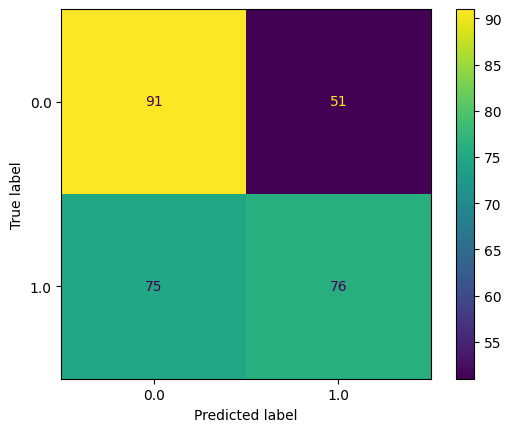

In [ ]:
#SVM
clf = svm.SVC(kernel='rbf') 
clf.fit(x_train, y_train) 
y_predict = clf.predict(x_test)
print(y_predict)
svm_ac = m.accuracy_score(y_test, y_predict)
svm_ps = m.precision_score(y_test, y_predict, average='macro')
svm_rs = m.recall_score(y_test, y_predict, average='macro')
svm_fs = m.f1_score(y_test, y_predict, average='macro')
RBF.append(str(round(svm_ac,2)))
RBF.append(str(round(svm_ps,2)))
RBF.append(str(round(svm_rs,2)))
RBF.append(str(round(svm_fs,2)))
print('Accuracy:',svm_ac)
print('Precision:',svm_ps)
print('Recall:',svm_rs)
print('F1:',svm_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

Decission **tree**

KNN

In [ ]:
clf1 = MultinomialNB() 
clf2 = svm.SVC()
clf3=RandomForestClassifier() 

# Khởi tạo mô hình Voting Classifier
voting = VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2),('clf3', clf3)], voting='hard')

# Huấn luyện mô hình trên tập huấn luyện
voting.fit(x_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred = voting.predict(x_test)

print('Acc: ', m.accuracy_score(y_test, y_pred))
print('prec: ',m.precision_score(y_test, y_pred)) 
print('recall: ',m.recall_score(y_test, y_pred))  
print('f1: ', m.f1_score(y_test, y_pred)) 

Acc:  0.8805460750853242
prec:  0.9202898550724637
recall:  0.8410596026490066
f1:  0.8788927335640138


Accuracy: 0.9590443686006825
Precision: 0.986013986013986
Recall: 0.9337748344370861
F1: 0.9591836734693878
[[140   2]
 [ 10 141]]
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       142
         1.0       0.99      0.93      0.96       151

    accuracy                           0.96       293
   macro avg       0.96      0.96      0.96       293
weighted avg       0.96      0.96      0.96       293



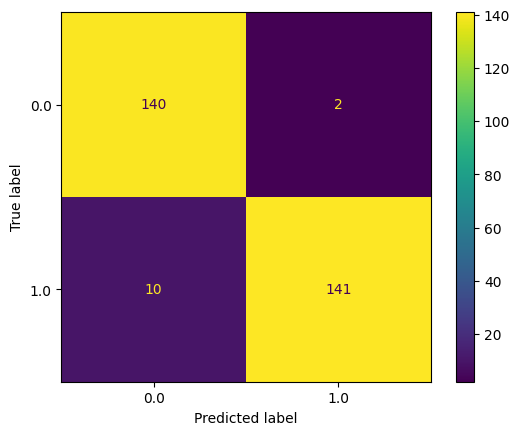

In [ ]:
# decision Tree
clf = tree.DecisionTreeClassifier(random_state=1)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
tree_ac = m.accuracy_score(y_test, y_predict)
tree_ps = m.precision_score(y_test, y_predict)
tree_rs = m.recall_score(y_test, y_predict)
tree_fs = m.f1_score(y_test, y_predict)
Tree =['Tree', str(round(tree_ac,2)),str(round(tree_ps,2)),str(round(tree_rs,2)),str(round(tree_fs,2))]
print('Accuracy:',tree_ac)
print('Precision:',tree_ps)
print('Recall:',tree_rs)
print('F1:',tree_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

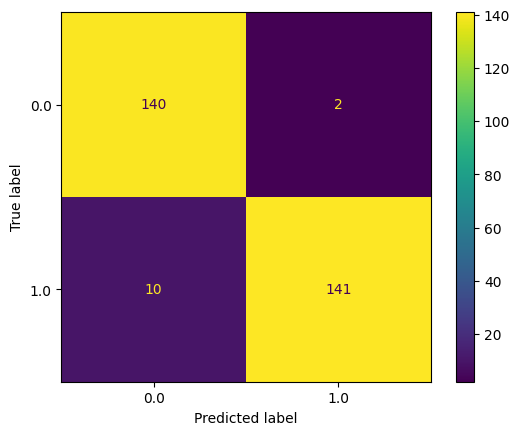

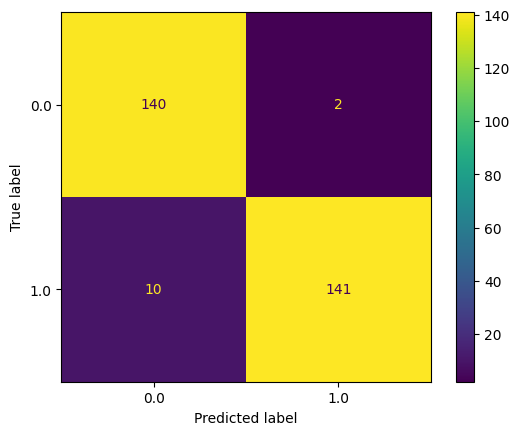

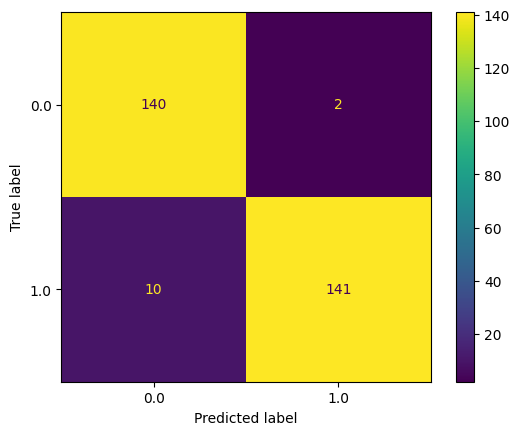

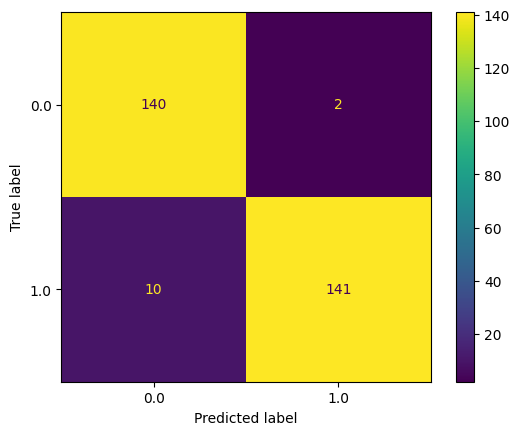

In [ ]:
#KNN
acc=[]
prec =[]
recall=[]
f1=[]
k_range = range(1,8,2)
for k in k_range:
  KNN = knc(n_neighbors=k)
  KNN.fit(x_train, y_train)
  pred = KNN.predict(x_test)
  acc.append(m.accuracy_score(y_test, pred))
  prec.append(m.precision_score(y_test, pred))
  recall.append( m.recall_score(y_test, pred))
  f1.append(m.f1_score(y_test, pred))
  m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
KNN = ['KNN', str(round(acc[3],2)), str(round(prec[3],2)), str(round(recall[3],2)), str(round(f1[3],2))]

In [ ]:

print('Accuracy:',KNN[1])
print('Precision:',KNN[2])
print('Recall:',KNN[3])
print('F1:',KNN[4])

Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1: 0.85


Accuracy: 0.6552901023890785
Precision: 0.6555975018642803
Recall: 0.6556990952336536
F1: 0.6552740404216902
[[95 47]
 [54 97]]
              precision    recall  f1-score   support

         0.0       0.64      0.67      0.65       142
         1.0       0.67      0.64      0.66       151

    accuracy                           0.66       293
   macro avg       0.66      0.66      0.66       293
weighted avg       0.66      0.66      0.66       293



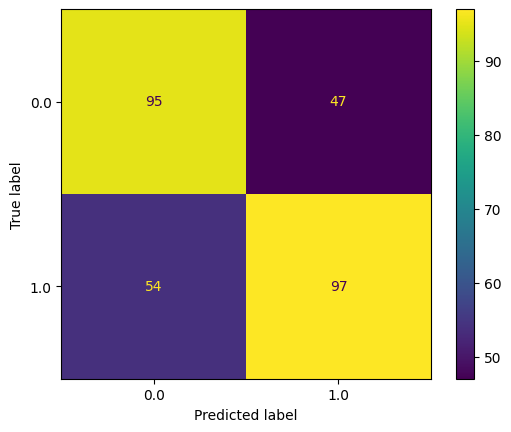

In [ ]:
#Linear
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
svm_ac = m.accuracy_score(y_test, y_predict)
svm_ps = m.precision_score(y_test, y_predict, average='macro')
svm_rs = m.recall_score(y_test, y_predict, average='macro')
svm_fs = m.f1_score(y_test, y_predict, average='macro')
Linear = ['Linear']
Linear.append(str(round(svm_ac,2)))
Linear.append(str(round(svm_ps,2)))
Linear.append(str(round(svm_rs,2)))
Linear.append(str(round(svm_fs,2)))
print('Accuracy:',svm_ac)
print('Precision:',svm_ps)
print('Recall:',svm_rs)
print('F1:',svm_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.42      0.13      0.19       142
         1.0       0.50      0.83      0.63       151

    accuracy                           0.49       293
   macro avg       0.46      0.48      0.41       293
weighted avg       0.46      0.49      0.42       293

              precision    recall  f1-score   support

         0.0       0.46      0.23      0.30       142
         1.0       0.51      0.75      0.60       151

    accuracy                           0.49       293
   macro avg       0.48      0.49      0.45       293
weighted avg       0.48      0.49      0.46       293

              precision    recall  f1-score   support

         0.0       0.45      0.21      0.29       142
         1.0       0.51      0.76      0.61       151

    accuracy                           0.49       293
   macro avg       0.48      0.49      0.45       293
weighted avg       0.48      0.49      0.45       293



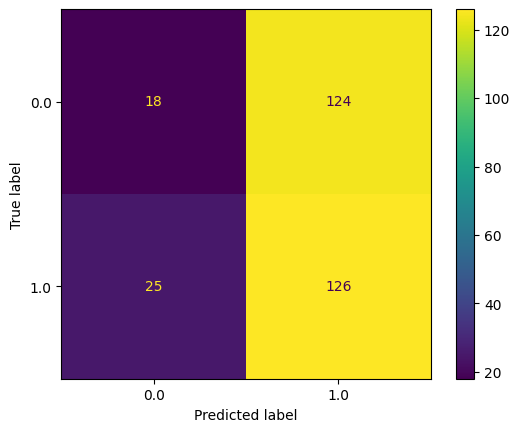

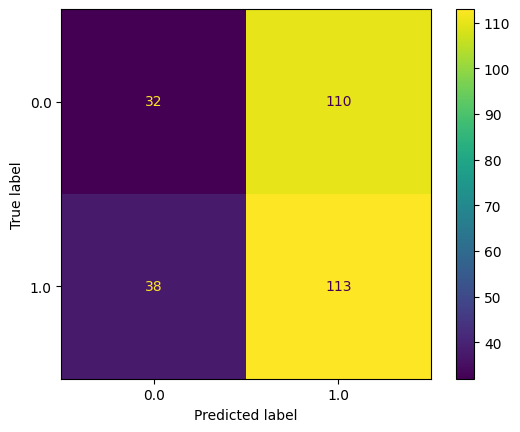

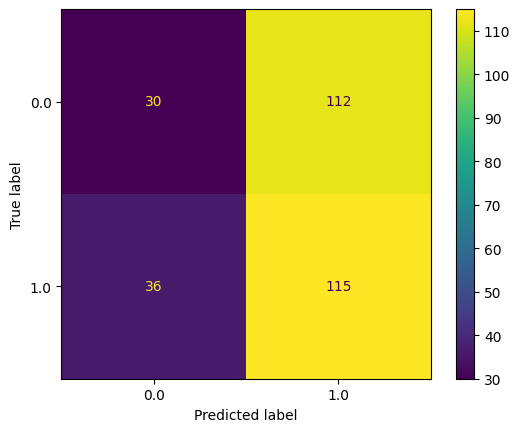

In [ ]:
#poly
d_range= range(3,6,1)
acc=[]
pre=[]
re=[]
f=[]
Poly=['Poly']
for d in d_range:
  clf = svm.SVC(kernel='poly', degree=d)
  clf.fit(x_train, y_train)
  y_predict = clf.predict(x_test)
  acc.append(m.accuracy_score(y_test, y_predict))
  pre.append(m.precision_score(y_test, y_predict, average='macro'))
  re.append(m.recall_score(y_test, y_predict, average='macro'))
  f.append(m.f1_score(y_test, y_predict, average='macro'))
  print(m.classification_report(y_test,y_predict))
  m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
max_index = acc.index(max(acc))
Poly.append(round(acc[max_index],2))
Poly.append(round(pre[max_index],2))
Poly.append(round(re[max_index],2))
Poly.append(round(f[max_index],2))


[1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1.
 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1.
 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0.
 0. 1. 1. 0. 0.]
Accuracy: 0.6109215017064846
Precision: 0.6105540527935827
Recall: 0.6105540527935827
F1: 0.610554052793582

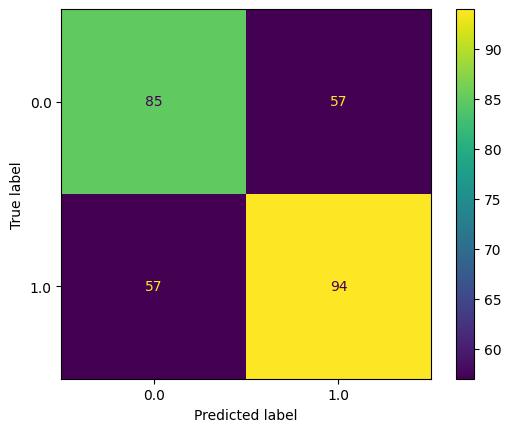

In [ ]:
clf = svm.SVC(kernel='sigmoid') 
clf.fit(x_train, y_train) 
y_predict = clf.predict(x_test)
print(y_predict)
svm_ac = m.accuracy_score(y_test, y_predict)
svm_ps = m.precision_score(y_test, y_predict, average='macro')
svm_rs = m.recall_score(y_test, y_predict, average='macro')
svm_fs = m.f1_score(y_test, y_predict, average='macro')
Sigmoid = ['Sigmoid']
Sigmoid.append(str(round(svm_ac,3)))
Sigmoid.append(str(round(svm_ps,3)))
Sigmoid.append(str(round(svm_rs,3)))
Sigmoid.append(str(round(svm_fs,3)))
print('Accuracy:',svm_ac)
print('Precision:',svm_ps)
print('Recall:',svm_rs)
print('F1:',svm_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

[1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 0. 0. 0.]
Accuracy: 0.590443686006826
Precision: 0.6009922217790188
Recall: 0.5944641358082269
F1: 0.585181689476168


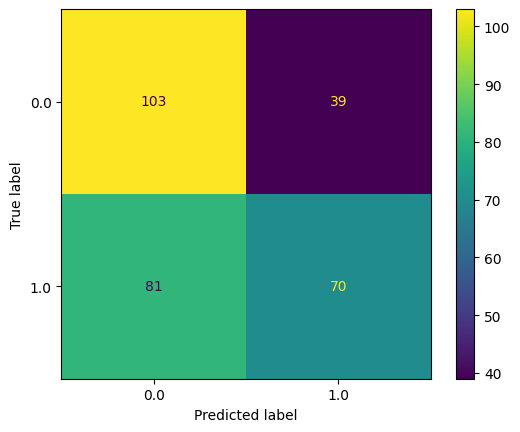

In [ ]:
clf = svm.SVC(kernel='rbf') 
clf.fit(x_train, y_train) 
y_predict = clf.predict(x_test)
print(y_predict)
svm_ac = m.accuracy_score(y_test, y_predict)
RBF = ['RBF']
svm_ps = m.precision_score(y_test, y_predict, average='macro')
svm_rs = m.recall_score(y_test, y_predict, average='macro')
svm_fs = m.f1_score(y_test, y_predict, average='macro')
RBF.append(str(round(svm_ac,2)))
RBF.append(str(round(svm_ps,2)))
RBF.append(str(round(svm_rs,2)))
RBF.append(str(round(svm_fs,2)))
print('Accuracy:',svm_ac)
print('Precision:',svm_ps)
print('Recall:',svm_rs)
print('F1:',svm_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

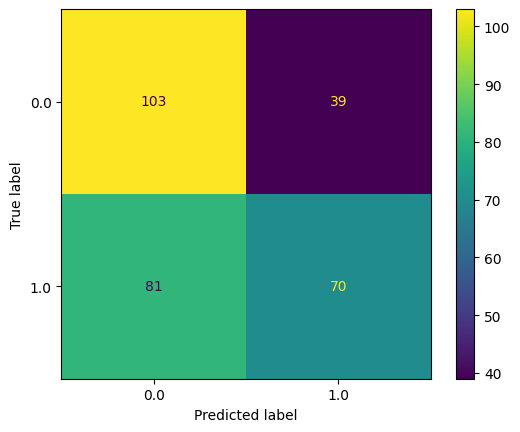

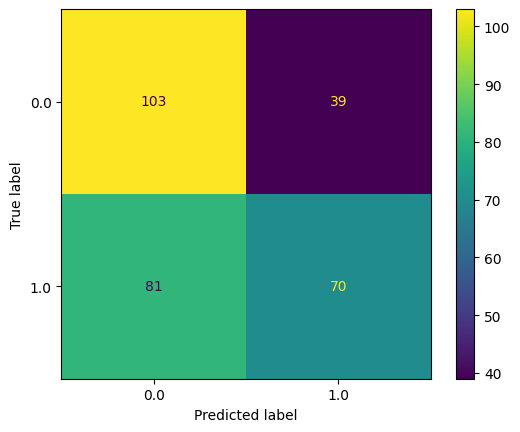

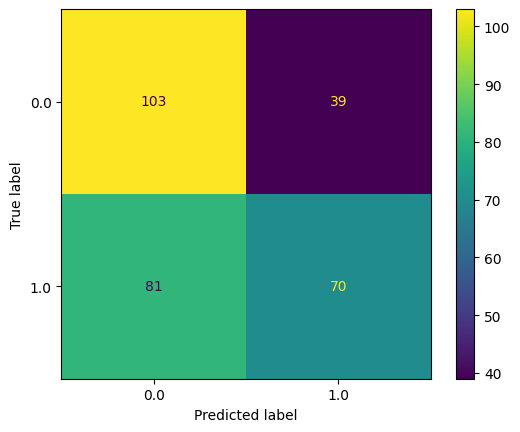

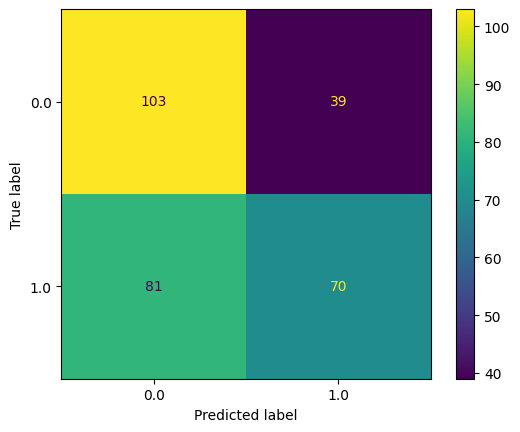

In [ ]:
#KNN
acc=[]
prec =[]
recall=[]
f1=[]
k_range = range(1,8,2)
for k in k_range:
  KNN = knc(n_neighbors=k)
  KNN.fit(x_train, y_train)
  pred = KNN.predict(x_test)
  acc.append(m.accuracy_score(y_test, pred))
  prec.append(m.precision_score(y_test, pred, average='macro'))
  recall.append( m.recall_score(y_test, pred, average='macro'))
  f1.append(m.f1_score(y_test, pred, average='macro'))
  m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
KNN = ['KNN', str(round(acc[3],2)), str(round(prec[3],2)), str(round(recall[3],2)), str(round(f1[3],2))]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6416382252559727
Precision: 0.6413033286451009
Recall: 0.6405652457793116
F1: 0.6405664014580632
[[ 86  56]
 [ 49 102]]
              precision    recall  f1-score   support

         0.0       0.64      0.61      0.62       142
         1.0       0.65      0.68      0.66       151

    accuracy                           0.64       293
   macro avg       0.64      0.64      0.64       293
weighted avg       0.64      0.64      0.64       293



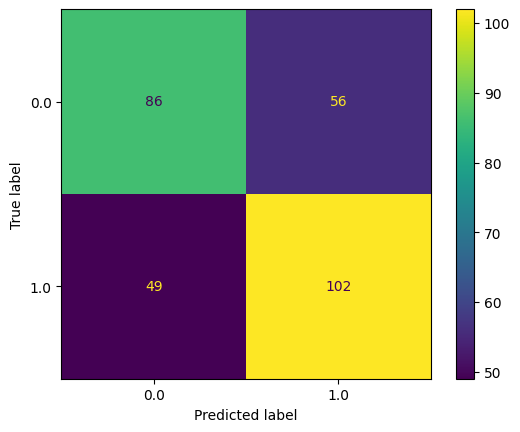

In [ ]:
#logistic regression
logistic = LogisticRegression(random_state=1)
logistic.fit(x_train, y_train) 
y_predict = logistic.predict(x_test)
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict, average='macro')
rs = m.recall_score(y_test, y_predict, average='macro')
fs = m.f1_score(y_test, y_predict, average='macro')
Logistic =['Logistic Regression', str(round(ac,2)), str(round(ps,2)), str(round(rs,2)), str(round(fs,2))]
print('Accuracy:',ac)
print('Precision:',ps)
print('Recall:',rs)
print('F1:',fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

[1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0.
 1. 0. 0. 0. 1.]
Accuracy: 0.9726962457337884
Precision: 0.9735099337748344
Recall: 0.9735099337748344
F1: 0.973509933774834

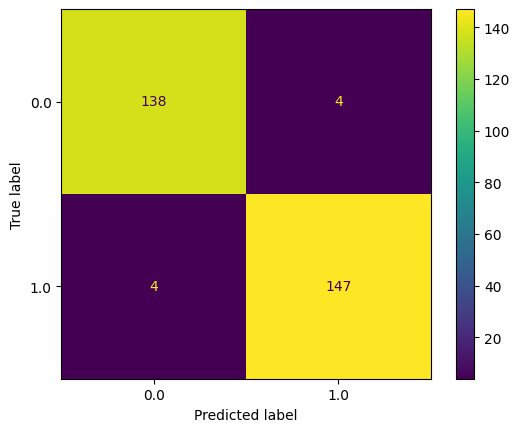

In [ ]:
# Random forest
clf=RandomForestClassifier() 
clf.fit(x_train,y_train) 
y_predict = clf.predict(x_test) 
print(y_predict)
rf_ac = m.accuracy_score(y_test, y_predict)
rf_ps = m.precision_score(y_test, y_predict)
rf_rs = m.recall_score(y_test, y_predict)
rf_fs = m.f1_score(y_test, y_predict)
RF.append(str(round(rf_ac,2)))
RF.append(str(round(rf_ps,2)))
RF.append(str(round(rf_rs,2)))
RF.append(str(round(rf_fs,2)))
print('Accuracy:',rf_ac)
print('Precision:',rf_ps)
print('Recall:',rf_rs)
print('F1:',rf_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

[0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 1. 1.]
Accuracy: 0.8668941979522184
Precision: 0.8733333333333333
Recall: 0.8675496688741722
F1: 0.870431893687707

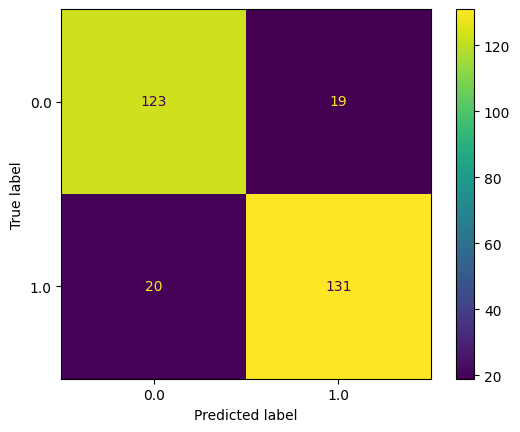

In [ ]:
#Navie Bayes
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(x_train, y_train) 
y_predict = clf.predict(x_test) 
print(y_predict)
nb_ac = m.accuracy_score(y_test, y_predict)
nb_ps = m.precision_score(y_test, y_predict)
nb_rs = m.recall_score(y_test, y_predict)
nb_fs = m.f1_score(y_test, y_predict)
NB.append(str(round(nb_ac,2)))
NB.append(str(round(nb_ps,2)))
NB.append(str(round(nb_rs,2)))
NB.append(str(round(nb_fs,2)))
print('Accuracy:',nb_ac)
print('Precision:',nb_ps)
print('Recall:',nb_rs)
print('F1:',nb_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

Accuracy: 0.962457337883959
Precision: 0.9628542132736764
Recall: 0.963156421975562
F1: 0.9624555885607782
[[140   2]
 [  9 142]]
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       142
         1.0       0.99      0.94      0.96       151

    accuracy                           0.96       293
   macro avg       0.96      0.96      0.96       293
weighted avg       0.96      0.96      0.96       293



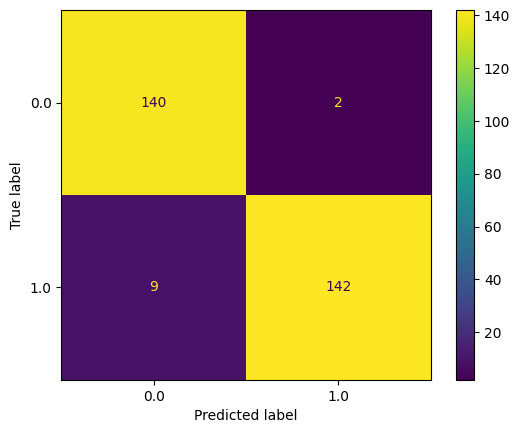

In [ ]:
#tree
clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
tree_ac = m.accuracy_score(y_test, y_predict)
tree_ps = m.precision_score(y_test, y_predict, average='macro')
tree_rs = m.recall_score(y_test, y_predict, average='macro')
tree_fs = m.f1_score(y_test, y_predict, average='macro')
Tree =['Tree', str(round(tree_ac,2)),str(round(tree_ps,2)),str(round(tree_rs,2)),str(round(tree_fs,2))]
print('Accuracy:',tree_ac)
print('Precision:',tree_ps)
print('Recall:',tree_rs)
print('F1:',tree_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

In [ ]:
from sklearn.neural_network import MLPClassifier

GSCV=['Neural network ']

clf = MLPClassifier(hidden_layer_sizes=(1500,1000,500))
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict, average='macro')
rs = m.recall_score(y_test, y_predict, average='macro')
fs = m.f1_score(y_test, y_predict, average='macro')
GSCV.append(str(round(ac,2)))
GSCV.append(str(round(ps,2)))
GSCV.append(str(round(rs,2)))
GSCV.append(str(round(fs,2)))
print('Accuracy:',ac)
print('Precision:',ps)
print('Recall:',rs)
print('F1:',fs)
print(m.classification_report(y_test,y_predict))

Accuracy: 0.7474402730375427
Precision: 0.7509868421052632
Recall: 0.7490905699095234
F1: 0.7472017535677642
              precision    recall  f1-score   support

         0.0       0.71      0.80      0.75       142
         1.0       0.79      0.70      0.74       151

    accuracy                           0.75       293
   macro avg       0.75      0.75      0.75       293
weighted avg       0.75      0.75      0.75       293



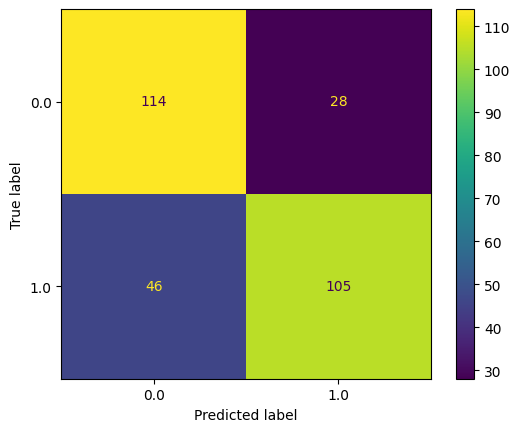

In [ ]:
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))

In [ ]:
t = PrettyTable(['Algorithm classification ', 'Acc', 'Pre', 'Recall', 'F1'])
t.add_row(NB)
t.add_row(RF)
t.add_row(RBF)
t.add_row(Tree)
t.add_row(KNN)
t.add_row(Logistic)
t.add_row(Poly)
t.add_row(Sigmoid)
t.add_row(Linear)
t.add_row(GSCV)

print(t)


+---------------------------+-------+-------+--------+-------+
| Algorithm classification  |  Acc  |  Pre  | Recall |   F1  |
+---------------------------+-------+-------+--------+-------+
|        Navie Bayes        |  0.87 |  0.87 |  0.87  |  0.87 |
|       Random Forest       |  0.97 |  0.97 |  0.97  |  0.97 |
|            RBF            |  0.59 |  0.6  |  0.59  |  0.59 |
|            Tree           |  0.96 |  0.96 |  0.96  |  0.96 |
|            KNN            |  0.85 |  0.85 |  0.85  |  0.85 |
|    Logistic Regression    |  0.64 |  0.64 |  0.64  |  0.64 |
|            Poly           |  0.51 |  0.5  |  0.5   |  0.47 |
|          Sigmoid          | 0.611 | 0.611 | 0.611  | 0.611 |
|           Linear          |  0.66 |  0.66 |  0.66  |  0.66 |
|      Neural network       |  0.6  |  0.69 |  0.59  |  0.53 |
+---------------------------+-------+-------+--------+-------+


In [ ]:
algorithms = ['Naive Bayes', 'Random Forest', 'RBF', 'Tree', 'KNN', 'Logistic Regression', 'Poly', 'Sigmoid', 'Linear', 'Neutral network']
accuracy = [0.87, 0.97, 0.59, 0.96, 0.85, 0.67, 0.51, 0.62, 0.66, 0.75]
precision = [0.97, 0.97, 0.64, 0.96, 0.85, 0.65, 0.50, 0.61, 0.67, 0.75]
recall = [0.87, 0.97, 0.59, 0.96, 0.85, 0.64, 0.50, 0.61, 0.65, 0.75]
f1 = [0.87, 0.97, 0.62, 0.96, 0.85, 0.65, 0.47, 0.61, 0.65, 0.75]

t = PrettyTable(['Algorithm classification', 'Acc', 'Pre', 'Recall', 'F1'])
for alg, acc, pre, rec, f1_score in zip(algorithms, accuracy, precision, recall, f1):
    t.add_row([alg, acc, pre, rec, f1_score])

print(t)


+--------------------------+------+------+--------+------+
| Algorithm classification | Acc  | Pre  | Recall |  F1  |
+--------------------------+------+------+--------+------+
|       Naive Bayes        | 0.87 | 0.97 |  0.87  | 0.87 |
|      Random Forest       | 0.97 | 0.97 |  0.97  | 0.97 |
|           RBF            | 0.59 | 0.64 |  0.59  | 0.62 |
|           Tree           | 0.96 | 0.96 |  0.96  | 0.96 |
|           KNN            | 0.85 | 0.85 |  0.85  | 0.85 |
|   Logistic Regression    | 0.67 | 0.65 |  0.64  | 0.65 |
|           Poly           | 0.51 | 0.5  |  0.5   | 0.47 |
|         Sigmoid          | 0.62 | 0.61 |  0.61  | 0.61 |
|          Linear          | 0.66 | 0.67 |  0.65  | 0.65 |
|     Neutral network      | 0.75 | 0.75 |  0.75  | 0.75 |
+--------------------------+------+------+--------+------+


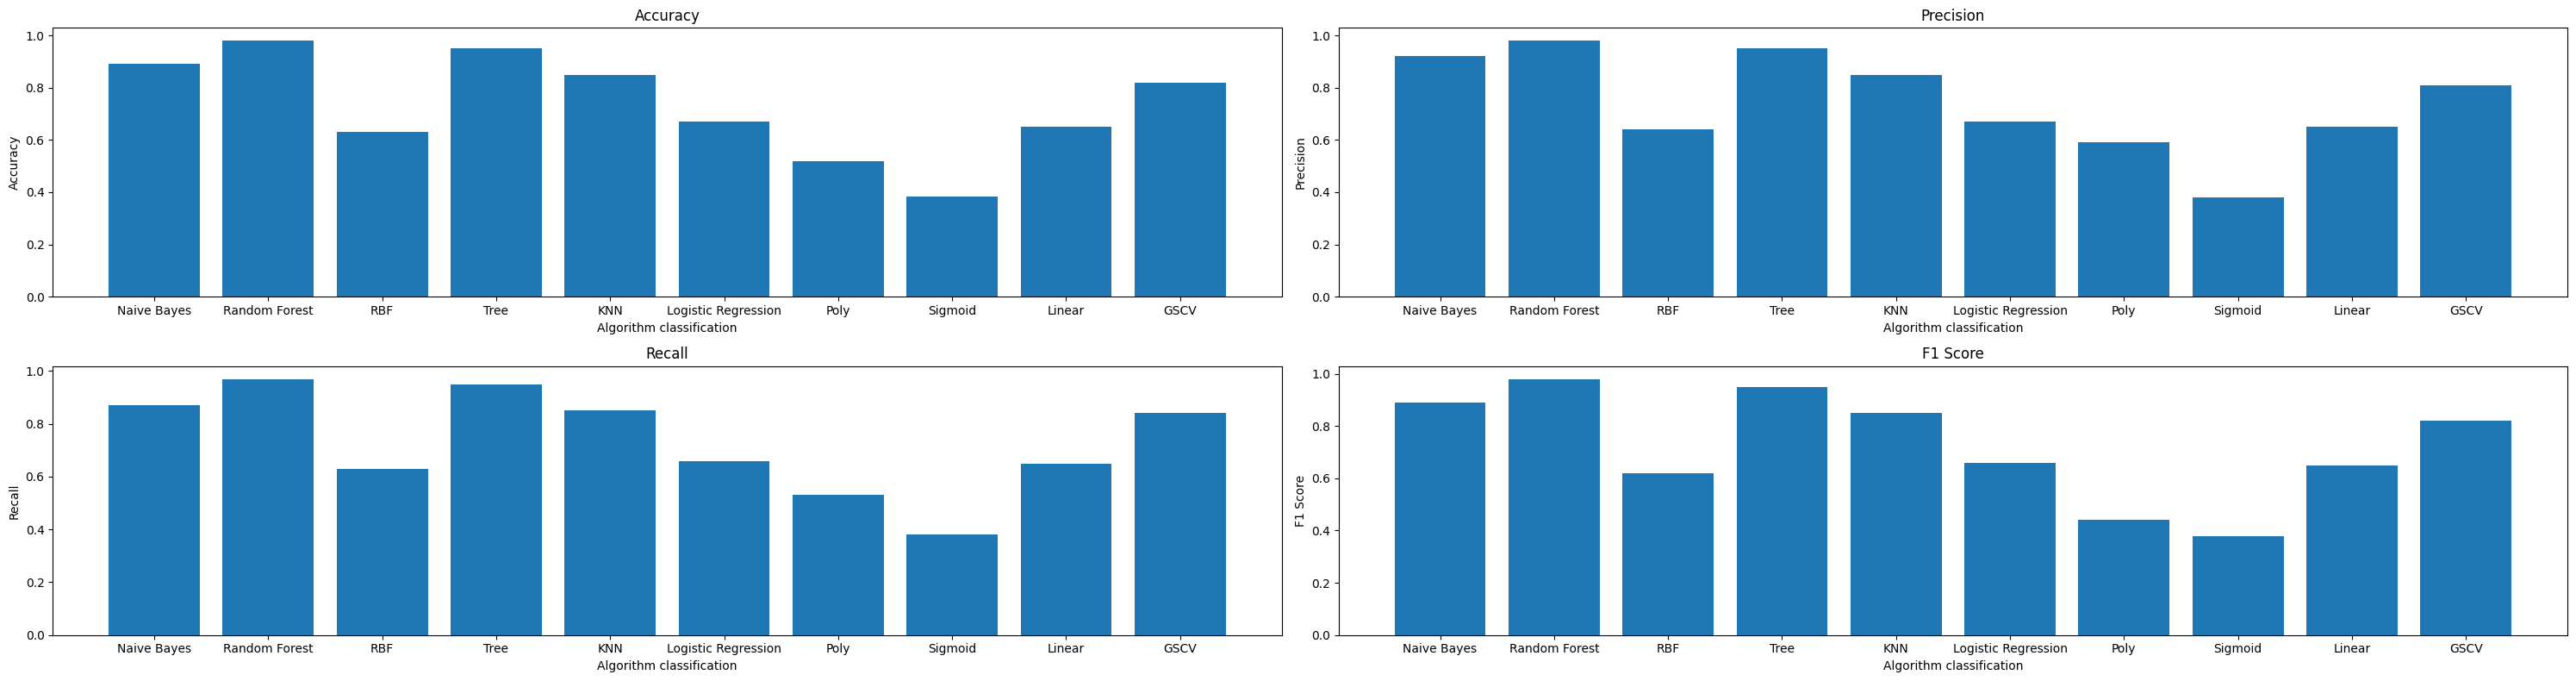

In [ ]:
import matplotlib.pyplot as plt

# Data for the bar graphs
algorithms = ['Naive Bayes', 'Random Forest', 'RBF', 'Tree', 'KNN', 'Logistic Regression', 'Poly', 'Sigmoid', 'Linear', 'GSCV']
accuracy = [0.89, 0.98, 0.63, 0.95, 0.85, 0.67, 0.52, 0.382, 0.65, 0.82]
precision = [0.92, 0.98, 0.64, 0.95, 0.85, 0.67, 0.59, 0.38, 0.65, 0.81]
recall = [0.87, 0.97, 0.63, 0.95, 0.85, 0.66, 0.53, 0.381, 0.65, 0.84]
f1 = [0.89, 0.98, 0.62, 0.95, 0.85, 0.66, 0.44, 0.38, 0.65, 0.82]

# Plotting the bar graphs
plt.figure(figsize=(30, 8))

# Accuracy
plt.subplot(2, 2, 1)
plt.bar(algorithms, accuracy)
plt.title('Accuracy')
plt.xlabel('Algorithm classification')
plt.ylabel('Accuracy')

# Precision
plt.subplot(2, 2, 2)
plt.bar(algorithms, precision)
plt.title('Precision')
plt.xlabel('Algorithm classification')
plt.ylabel('Precision')

# Recall
plt.subplot(2, 2, 3)
plt.bar(algorithms, recall)
plt.title('Recall')
plt.xlabel('Algorithm classification')
plt.ylabel('Recall')

# F1 Score
plt.subplot(2, 2, 4)
plt.bar(algorithms, f1)
plt.title('F1 Score')
plt.xlabel('Algorithm classification')
plt.ylabel('F1 Score')

# Adjusting the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

#Finally,
Save a copy in your Github. Remember renaming the notebook.